# Sina Tijani

In [1]:
# importing the necessary packages

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
%matplotlib inline

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
# loading the superstore dataset.
# changing the data types for Order Date and Ship Date

data = pd.read_csv('superstore data.csv',parse_dates=['Order Date','Ship Date'],encoding='latin1')

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3E4F-66D3

 Directory of c:\Users\cryptoanis\Github\blossom_academy\project_python

07/03/2022  05:29 PM    <DIR>          .
07/03/2022  05:16 PM    <DIR>          ..
07/03/2022  05:41 PM            33,168 Mid-Course Project_sina_tijani.ipynb
06/25/2022  05:34 PM         1,792,775 sina_tijani_mid_course_project.pptx
07/03/2022  02:03 PM        12,033,474 superstore data.csv
               3 File(s)     13,859,417 bytes
               2 Dir(s)  122,784,182,272 bytes free


In [4]:
# taking a look at the sales data fromt the top

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
# taking a look at the sales data fromt the bottom

data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [6]:
# finding the number of rows and columns

data.shape

(51290, 24)

In [7]:
# inspecting the whole dataset for general information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
# listing the columns in the dataset

list(data.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

Since I prefer working with my dataset with the column heads appearing in lower case, with no spaces between them, and no hyphens, I have to format them.

In [9]:
# formatting the column heads.
# changing all to lower case
# replacing spaces and hypthens with underscores

data.columns = data.columns.str.lower().str.replace(' ','_').str.replace('-','_')

In [10]:
# crosschecking if the changes are made in the column heads

data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [11]:
# finding total number of missing values across the dataset

data.isnull().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [12]:
# checking the shape to find the number of rows and columns of the dataset

data.shape

(51290, 24)

From the info above, Postal Code has 41,296 missing out of the 51,290.

In [13]:
# finding percentage of missing data

41296/51290

0.8051472021836615

over 80% data is missing for Postal Code column. that is more than acceptable. let's drop the column.

In [14]:
# dropping postal code column and assigning it to a new data set

dataNew = data.drop(['postal_code'],axis = 1)

In [15]:
# inspecting the new dataset without postal code

dataNew.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [16]:
# finding total unique entries for all columns

dataNew.nunique()

row_id            51290
order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_id        1590
customer_name       795
segment               3
city               3636
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales             22995
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
dtype: int64

From the above, Row ID column is  is perfectly unique as it has equal number of unique values to the number of columns which is great.

Now let's perform some analysis

### 1. What is the sales and profit per market?

In [17]:
# grouping the data by market, and selecting sale and profit

market_sales_profit = dataNew.groupby('market')[['sales','profit']].sum().round(2)
market_sales_profit

,sales,profit
market,,
APAC,3585744.13,436000.05
Africa,783773.21,88871.63
Canada,66928.17,17817.39
EMEA,806161.31,43897.97
EU,2938089.06,372829.74
LATAM,2164605.17,221643.49
US,2297200.86,286397.02


In [18]:
# # plotting market and sales with category

# sns.catplot(x="sales",
#             y="profit",
#             data = data,
#             kind = 'bar',
#             hue="market",
#             ci = None)
# # Show plot
# plt.show()

In [19]:
# saving the table to an excel

market_sales_profit.to_excel('market_sales_profit.xlsx')

The sales and profit per market are group above in the data frame

### 2. What is the most and least profitable market?

In [20]:
# sorting the markets by their profits

market_profit = dataNew.groupby('market')[['profit']].sum().sort_values('profit', ascending=False)
market_profit

,profit
market,
APAC,436000.04900
EU,372829.74150
US,286397.02170
LATAM,221643.48708
Africa,88871.63100
EMEA,43897.97100
Canada,17817.39000


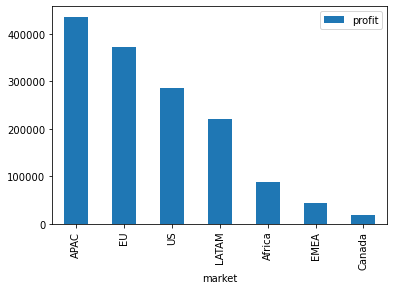

In [21]:
# plotting market profit on a bar chart

market_profit.plot.bar()
plt.savefig('market_profit.png')
plt.show()

The most profitable market is APAC, and
the least profitable market is Canada

### 3. How are you going to increase the sales for the products that least bought?

In [22]:
#finding the least bought product

prodSales = dataNew.groupby('product_name').sum()[['quantity']].sort_values('quantity', ascending=True)
prodSales

,quantity
product_name,
Penpower WorldCard Pro Card Scanner,1
Boston 1900 Electric Pencil Sharpener,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
"Chromcraft Training Table, Adjustable Height",1
Xerox 20,1
...,...
"Sanford Pencil Sharpener, Water Color",259
"Rogers File Cart, Single Width",262
"Eldon File Cart, Single Width",321


There could be a number of reasons why these products have fewer quantities bought. It could be poor placements across the store; poor prices labelling. Even discounting. Strategies can be taken along these lines among others to improve their sales.

Here, i want to analyze and find the peak days of the company. On these busy days, the company can stragetically place these poor performing products in plane sights so they are easy to be discovered. From that we can make a couple of decisions. 

Like place these products strategically in store and on the company's website to get more attention, taps, and engagement.  


In [23]:
# grouping the dataset by product name to find those with low sales

least_bought_products = dataNew.groupby('product_name')[['sales', 'quantity']].sum().round(2).sort_values('quantity', ascending=True)
least_bought_products

,sales,quantity
product_name,,
Penpower WorldCard Pro Card Scanner,91.48,1
Boston 1900 Electric Pencil Sharpener,14.98,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",119.83,1
"Chromcraft Training Table, Adjustable Height",38.14,1
Xerox 20,6.48,1
...,...,...
"Sanford Pencil Sharpener, Water Color",5581.97,259
"Rogers File Cart, Single Width",29466.31,262
"Eldon File Cart, Single Width",34387.73,321


On what particular day(s) do the company record most quantity sales

In [24]:
# checking the data

dataNew.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


I decide to use ship date instead of order date because, customers can come back to cancel orders they have placed already to stop them from being shipped at all. Though there can be return inwards of products that are already shipped, most from this data, likely ship date reveals the product was finally shipped and likely received by customers than order date. Hence, i will create the day, month, and year from the ship date column.

In [25]:
# creating a day column

day = dataNew.ship_date.dt.day

# there is no month column. creating a month column from ship date

month = dataNew.ship_date.dt.month

# creating a year column

year = dataNew.ship_date.dt.year

In [26]:
# inserting the day column

dataNew.insert(4, 'day', day)

# inserting the new month colum to follow the ship date column

dataNew.insert(5, 'month', month)

# inserting the year column

dataNew.insert(6, 'year', year)

In [27]:
# checking if the day, month, and year column are well inserted

dataNew.head(3)

,row_id,order_id,order_date,ship_date,day,month,year,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,1,6,2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,1,5,2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [28]:
# grouping the dataset by day and counting quantities of products sold.

daily_quantity_sold = dataNew.groupby('day')[['quantity']].count()
daily_quantity_sold

,quantity
day,
1,1424
2,897
3,1084
4,1216
5,1332
6,1912
7,1492
8,1712
9,2203


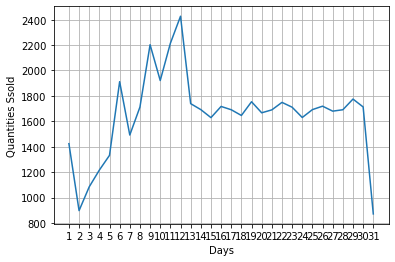

<Figure size 14400x10800 with 0 Axes>

In [29]:
# pairing like days in the day groupby to aid in plotting the line graph

#daily_quantity_sold = dataNew.groupby('day')[['quantity']].count()
days = [day for day, df in dataNew.groupby('day')]

plt.plot(days, daily_quantity_sold)
plt.xlabel('Days')
plt.ylabel('Quantities Ssold')
plt.xticks(days)
plt.grid()
plt.figure(figsize=(200,150))

plt.show()

On the graph above, the company's peak days from 6th to 21st of every month where huge quantities of items are bought across the store. While the quantities drops on Day 7, the trend shows it picks up on Day 8 and continues throughout to Day 12.

Since many customers shop around these 7 days (from 6th to 12th), several ads for the poor performing products can be placed strategically on the company's website  to target them; on the homepage, on main product category navigation pages to get more views, at checkout pages, and more

### 4. Which month does the company records more sales?

In [30]:
dataNew.head(5)

,row_id,order_id,order_date,ship_date,day,month,year,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,1,6,2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,1,5,2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,1,5,2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [31]:
# grouping the dataset by month, and finding sales

month_sales = dataNew.groupby('month')[['sales']].sum().round(2).sort_values('sales', ascending=False)
month_sales

,sales
month,
12,1376071.39
11,1347228.20
9,1298319.42
8,1191567.95
6,1155397.97
10,1108352.53
5,924581.69
3,906283.68
7,905400.08


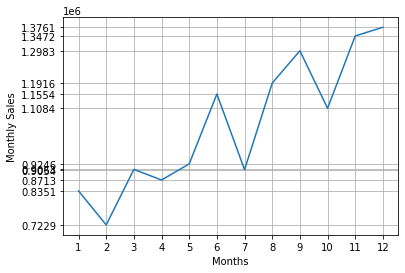

<Figure size 1152x576 with 0 Axes>

In [32]:
# pairing like month in the month groupby to aid in plotting the line graph

month_sales = dataNew.groupby('month')[['sales']].sum().round(2)
months = [month for month, df in dataNew.groupby('month')]

plt.plot(months, month_sales)
plt.xlabel('Months')
plt.ylabel('Monthly Sales')
plt.xticks(months)
plt.yticks(month_sales.sales)
plt.grid()
plt.figure(figsize = (16,8))

plt.show()

From the above, December recorded the most sales

### 5. What is the correlation between discount and sale?

In [33]:
# checking the dataset and discount column

dataNew.head(5)

,row_id,order_id,order_date,ship_date,day,month,year,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,1,6,2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,1,5,2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,1,5,2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


The discount column is in percentages. selling price is not given. but there are columns for sales and quantity.

In [34]:
# calculating for unit selling price after discount is applied

selling_price = dataNew.sales/dataNew.quantity
selling_price

0        204.150
1         40.122
2         16.530
3         14.955
4         22.734
          ...   
51285      6.952
51286      3.990
51287      8.800
51288      7.120
51289      1.008
Length: 51290, dtype: float64

In [35]:
#  inserting the selling price right before sales

dataNew.insert(18, 'selling_price', selling_price)

In [36]:
# checking if selling price column is well placed

dataNew.head(3)

,row_id,order_id,order_date,ship_date,day,month,year,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,selling_price,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,1,6,2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,204.150,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,40.122,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,1,5,2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,16.530,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [37]:
# calculating for unit price before discount applied

unit_price = dataNew.selling_price / (1 - dataNew.discount)

In [38]:
# inserting unit price before selling_price

dataNew.insert(18, 'unit_price', unit_price)

In [39]:
# checking if the unit price is placed well

dataNew.head(3)

,row_id,order_id,order_date,ship_date,day,month,year,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,unit_price,selling_price,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,1,6,2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,204.15,204.150,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,44.58,40.122,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,1,5,2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,16.53,16.530,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [40]:
# calculating discount amount given 

discount_amount = dataNew.discount * dataNew.unit_price

In [41]:
#dataNew.drop('discount_amount', axis=1, inplace=True)

In [42]:
# inserting the discount amount into the dataset after discount

dataNew.insert(19, 'discount_amount', discount_amount)

In [43]:
dataNew.head(3)

,row_id,order_id,order_date,ship_date,day,month,year,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,unit_price,discount_amount,selling_price,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,1,6,2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,204.15,0.000,204.150,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,1,8,2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,44.58,4.458,40.122,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,1,5,2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,16.53,0.000,16.530,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


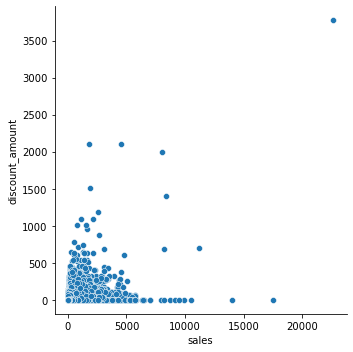

In [44]:
# plotting sales and discount amount given on a scatter plot

sns.relplot(
    x='sales',
    y='discount_amount',
    data=dataNew,
    kind='scatter',
    ci=None
)

plt.show()

In [45]:
# calculating correlation coefficient between discount and sales

dataNew.discount_amount.corr(dataNew.sales)

0.3012473205736262

From the above, sales compared to discount amount has a correlation coefficient of 0.30 which while it shows a positive correlation before the two, it is a weak correlation

### 6. Does the shipping cost affect the sales?

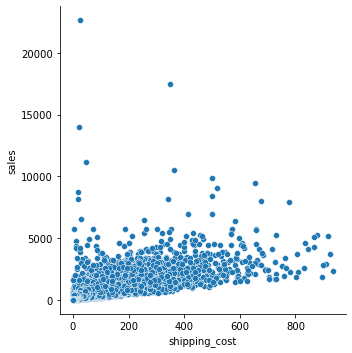

In [46]:
# plotting shipping cost and sales on a scatter plot to show their correlation

sns.relplot(
    x='shipping_cost',
    y='sales',
    data=dataNew,
    kind='scatter',
    ci=None
)

plt.show()

In [47]:
# finding the correlation coefficient between shipping cost and sales
dataNew.shipping_cost.corr(dataNew.sales)

0.7680728376889517

From the scatter plot show above, and with correlation coefficient of 0.768073 between shipping cost and sales, there is a moderate positive relationship between them. so shipping cost do affect sales

### 7. What is the dominant product category in each market?

In [48]:
# grouping the dataset by product category and market, and using sales to find the dominant category

# market_category_sales = dataNew.groupby(['market','category'])[['sales']].sum().round(2).sort_values('sales',ascending=False)
# market_category_sales

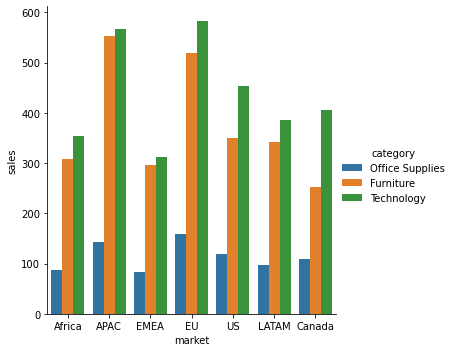

In [49]:
# plotting market and sales with category

sns.catplot(x="market",
            y="sales",
            data = data,
            kind = 'bar',
            hue="category",
            ci = None)
# Show plot
plt.show()

From the bar chart above, in terms of sales,

1. Technology is dominant in APAC, Africa, EMEA, EU, and in the US.
2. Office Supplies is dominant in Canada
3. Furniture is dominant in LATAM


### 8. City with most orders for a given product category?

In [50]:
# checking the order id column
dataNew.order_id

0           AG-2011-2040
1          IN-2011-47883
2           HU-2011-1220
3        IT-2011-3647632
4          IN-2011-47883
              ...       
51285     CA-2014-115427
51286       MO-2014-2560
51287     MX-2014-110527
51288     MX-2014-114783
51289     CA-2014-156720
Name: order_id, Length: 51290, dtype: object

In [51]:
# grouping the dataset by category and city, then counting the number of orders using order_id. after sorting by descending order

city_category_orders = dataNew.groupby(['category', 'city'])[['order_id']].count().sort_values('order_id', ascending=False)
city_category_orders.head(20)

order_id
category        city                   
Office Supplies New York City       552
                Los Angeles         443
                San Francisco       322
                Philadelphia        312
                Santo Domingo       250
                Seattle             249
                Houston             231
                Manila              227
                Lagos               213
                Tegucigalpa         207
                Istanbul            207
                Managua             197
                Jakarta             197
Furniture       New York City       192
Office Supplies Chicago             187
                London              183
Technology      New York City       171
Office Supplies Mexico City         170
                Bangkok             164
                Vienna              163

The above code, while simple and it works, could become challenging if the dataset were to grow. It will be difficult to glance over to find the cities with most orders for product categories. We need to subset the categories then find the best performing cities.

In [52]:
# finding how many unique categories are there

print(dataNew.category.nunique())
dataNew.category.unique()

3


array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [53]:
# subsetting office supplies

office_supplies = dataNew[dataNew.category == 'Office Supplies']

# subsetting Technology

technology = dataNew[dataNew.category == 'Technology']

# subsetting Furniture

furniture = dataNew[dataNew.category == 'Furniture']

In [54]:
# grouping the dataset for office supplies, city, then counting the number of orders using order_id. after sorting by descending order

office_supplies_city_orders = office_supplies.groupby(['category', 'city'])[['order_id']].count().sort_values('order_id', ascending=False)
office_supplies_city_orders.head(3)

order_id
category        city                   
Office Supplies New York City       552
                Los Angeles         443
                San Francisco       322

In [55]:
# grouping the dataset for technology, city, then counting the number of orders using order_id. after sorting by descending order

technology_city_orders = technology.groupby(['category', 'city'])[['order_id']].count().sort_values('order_id', ascending=False)
technology_city_orders.head(3)

order_id
category   city                   
Technology New York City       171
           Los Angeles         150
           Philadelphia        114

In [56]:
# grouping the dataset for furniture, city, then counting the number of orders using order_id. after sorting by descending order

furniture_city_orders = furniture.groupby(['category', 'city'])[['order_id']].count().sort_values('order_id', ascending=False)
furniture_city_orders.head(3)

order_id
category  city                   
Furniture New York City       192
          Los Angeles         154
          Philadelphia        111

In [57]:
dataNew.city.nunique()

3636

From the above, New York City has the most orders for the three product categories.

### 9. which products are making loss?

In [58]:
#grouping profit by product name, sorting to find the losses

product_loss = dataNew.groupby('product_name').sum()[['profit']].sort_values('profit',ascending=True).round(2)
product_loss[['profit']]

,profit
product_name,
Cubify CubeX 3D Printer Double Head Print,-8879.97
Lexmark MX611dhe Monochrome Laser Printer,-4589.97
"Motorola Smart Phone, Cordless",-4447.04
Cubify CubeX 3D Printer Triple Head Print,-3839.99
"Bevis Round Table, Adjustable Height",-3649.89
...,...
"Sauder Classic Bookcase, Traditional",10672.07
"Hoover Stove, Red",11807.97
"Motorola Smart Phone, Full Size",17027.11


In [59]:
# subsetting all the product with profits less than zero for loss

product_loss = product_loss[product_loss.profit < 0]
product_loss

,profit
product_name,
Cubify CubeX 3D Printer Double Head Print,-8879.97
Lexmark MX611dhe Monochrome Laser Printer,-4589.97
"Motorola Smart Phone, Cordless",-4447.04
Cubify CubeX 3D Printer Triple Head Print,-3839.99
"Bevis Round Table, Adjustable Height",-3649.89
...,...
Eldon Gobal File Keepers,-0.61
"Brites Rubber Bands, 1 1/2 oz. Box",-0.51
Rubber Band Ball,-0.30


In [60]:
# changing the column head profit to loss

product_loss = product_loss.rename(columns = {"profit":"loss"})

In [61]:
# checking if the column head has changed

product_loss

,loss
product_name,
Cubify CubeX 3D Printer Double Head Print,-8879.97
Lexmark MX611dhe Monochrome Laser Printer,-4589.97
"Motorola Smart Phone, Cordless",-4447.04
Cubify CubeX 3D Printer Triple Head Print,-3839.99
"Bevis Round Table, Adjustable Height",-3649.89
...,...
Eldon Gobal File Keepers,-0.61
"Brites Rubber Bands, 1 1/2 oz. Box",-0.51
Rubber Band Ball,-0.30


In [62]:
# saving the products making losses as an excel document for easy access by management

product_loss.to_excel('products_making_losses.xlsx')

In [63]:
# checking the total number of products

print('Total number of products: ', dataNew.product_name.nunique())

# checking the total number of products with losses

print('Total number of products with losses: ', len(product_loss))

# finding percent of products with losses

print('Percent of products with losses: ', (int(len(product_loss) / dataNew.product_name.nunique() * 100)), '%')

Total number of products:  3788
Total number of products with losses:  675
Percent of products with losses:  17 %


The above shows all the products with losses. There are 675 products making a losses out of 3,788 products available.

17% of the companies products are making losses. That needs to be corrected.

### 10. Which segment provides more profit?

In [64]:
# grouping the profit by segment

profitable_segment = dataNew.groupby('segment')[['profit']].sum().round(2).sort_values('profit', ascending=False)
profitable_segment

,profit
segment,
Consumer,749239.78
Corporate,441208.33
Home Office,277009.18


In [65]:
# saving segment profits as a table

profitable_segment.to_excel('profitable_segment.xlsx')

From the above, the Consumer segment makes more profit compared to the corporate and Home Office

### 11. what is the correlation between quantity and profit?

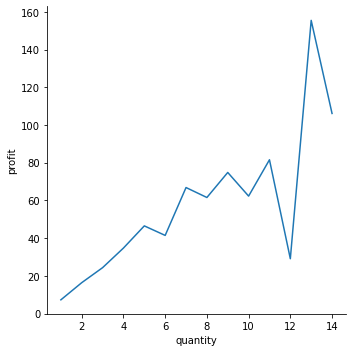

In [66]:
sns.relplot(x='quantity',
            y =  'profit',
            data = dataNew,
            kind = 'line',
            ci = None)
plt.show()

From the line chart above, we can see there is a very positive correlation between quantity and profit. As quantity increases, so does the profit made

### 12. what it the correlation between shipping cost and profit?

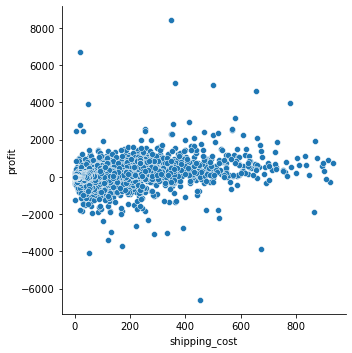

In [67]:
# plotting shipping cost and profit on a scatter plot

sns.relplot(
    x='shipping_cost',
    y='profit',
    data= dataNew,
    kind = 'scatter',
    ci = None)
plt.show()


In [68]:
#dataNew['shipping_cost'].corr(dataNew.profit)

dataNew.shipping_cost.corr(dataNew.profit)

0.3544409015326752

From the scatter plot above, and the correlation coefficient of 0.35, there is a weak correlation between shipping cost and profit

### 13. Which order priority yields more sales?

In [69]:
# grouping the dataset by order priority then finding sales

order_priority_sales = dataNew.groupby('order_priority')[['sales']].sum().round(2).sort_values('sales', ascending=False)
order_priority_sales

,sales
order_priority,
Medium,7280892.37
High,3807548.14
Critical,986235.46
Low,567825.93


The order priority that yields more sales is Medium

In [70]:
order_priority_sales.to_excel('order_priority_sales.xlsx')

### 14. What is the average shipping cost to each region?

In [71]:
#grouping shipping cost by region, finding their mean, sorting, and rounding the means figures

average_shipping_cost_region = dataNew.groupby('region')[['shipping_cost']].mean().sort_values('shipping_cost',ascending=False).round(2)
average_shipping_cost_region

,shipping_cost
region,
North Asia,40.65
Central Asia,38.00
Oceania,34.59
Southeast Asia,29.94
North,27.48
Central,26.71
East,25.54
South,25.35
West,23.89


In [72]:
average_shipping_cost_region.to_excel('average_shipping_cost_region.xlsx')

The average shipping cost to each region is as seen above. It has also been sorted to make it easy to find the min and max average 

### 15. What product categories should be targetted to the  different markets?

In [73]:
# creating a pivot table of the data using category as index, market as columns, and sales as values

product_market_sales_pivottable = dataNew.pivot_table(
                                                    index= 'category',
                                                    columns= 'market',
                                                    values = 'sales',
                                                    aggfunc = 'sum').round(2)
product_market_sales_pivottable
    

market,APAC,Africa,Canada,EMEA,EU,LATAM,US
category,,,,,,,
Furniture,1343934.07,194650.64,10595.28,228620.74,779103.05,811970.62,741999.80
Office Supplies,884319.83,266755.53,30034.08,276685.99,1046307.02,563920.73,719047.03
Technology,1357490.23,322367.04,26298.81,300854.58,1112678.99,788713.82,836154.03


In [74]:
product_market_sales_pivottable.to_excel('product_market_sales_pivottable.xlsx')